<a href="https://colab.research.google.com/github/Pongsophon/climate-change-analysis/blob/main/Climate_Change.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

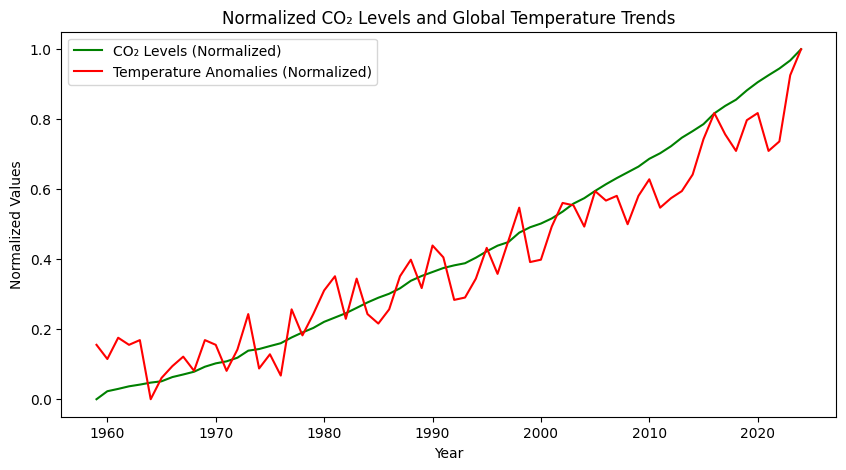

Correlation coefficient between CO₂ and Temperature Anomalies: 0.96


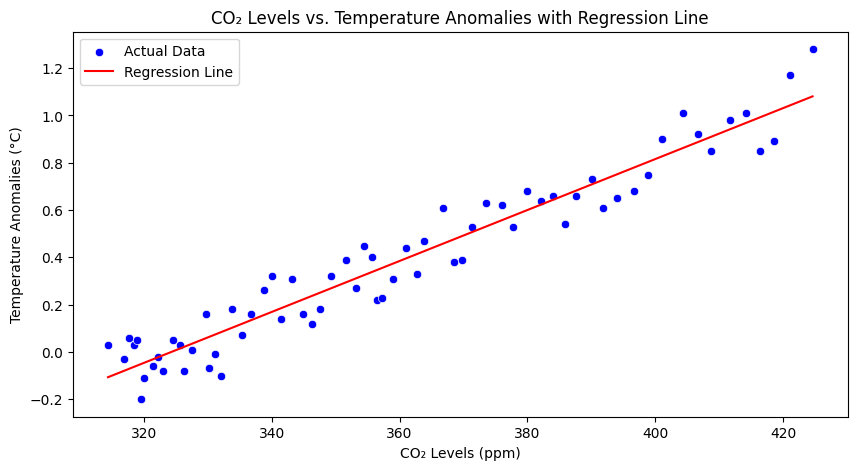

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np

# Define file paths for cleaned datasets
co2_file_path = "/content/cleaned_co2_data.csv"  # Path to cleaned CO₂ dataset
temp_file_path = "/content/cleaned_temperature_anomalies.csv"  # Path to cleaned temperature dataset

# Load cleaned NOAA CO₂ data
co2_data = pd.read_csv(co2_file_path)

# Ensure correct column naming for CO₂ data
co2_data.rename(columns={"Average CO2": "CO2"}, inplace=True)

# Drop missing values (if any) and aggregate CO₂ data by Year
co2_data = co2_data.dropna(subset=["CO2"]).groupby("Year", as_index=False)["CO2"].mean()

# Load cleaned NASA temperature anomaly data
temp_data = pd.read_csv(temp_file_path)

# Ensure correct column naming for temperature anomalies
temp_data.rename(columns={"Temperature_Anomaly": "Temperature_Anomaly"}, inplace=True)

# Merge datasets on "Year"
climate_data = pd.merge(co2_data, temp_data, on="Year", how="inner")

# Normalize CO₂ and Temperature Anomalies for visualization
climate_data["CO2_Normalized"] = (climate_data["CO2"] - climate_data["CO2"].min()) / (climate_data["CO2"].max() - climate_data["CO2"].min())
climate_data["Temperature_Normalized"] = (climate_data["Temperature_Anomaly"] - climate_data["Temperature_Anomaly"].min()) / (climate_data["Temperature_Anomaly"].max() - climate_data["Temperature_Anomaly"].min())

# Plot normalized trends
plt.figure(figsize=(10, 5))
plt.plot(climate_data["Year"], climate_data["CO2_Normalized"], label="CO₂ Levels (Normalized)", color="green")
plt.plot(climate_data["Year"], climate_data["Temperature_Normalized"], label="Temperature Anomalies (Normalized)", color="red")
plt.legend()
plt.xlabel("Year")
plt.ylabel("Normalized Values")
plt.title("Normalized CO₂ Levels and Global Temperature Trends")
plt.show()

# Linear Regression Model
X = climate_data[["CO2"]]
y = climate_data["Temperature_Anomaly"]
model = LinearRegression()
model.fit(X, y)
climate_data["Predicted_Temperature"] = model.predict(X)

# Display correlation coefficient
correlation = np.corrcoef(climate_data["CO2"], climate_data["Temperature_Anomaly"])[0, 1]
print(f"Correlation coefficient between CO₂ and Temperature Anomalies: {correlation:.2f}")

# Plot CO₂ vs. Temperature Anomaly with Regression Line
plt.figure(figsize=(10, 5))
sns.scatterplot(x="CO2", y="Temperature_Anomaly", data=climate_data, color="blue", label="Actual Data")
plt.plot(climate_data["CO2"], climate_data["Predicted_Temperature"], color="red", label="Regression Line")
plt.xlabel("CO₂ Levels (ppm)")
plt.ylabel("Temperature Anomalies (°C)")
plt.title("CO₂ Levels vs. Temperature Anomalies with Regression Line")
plt.legend()
plt.show()


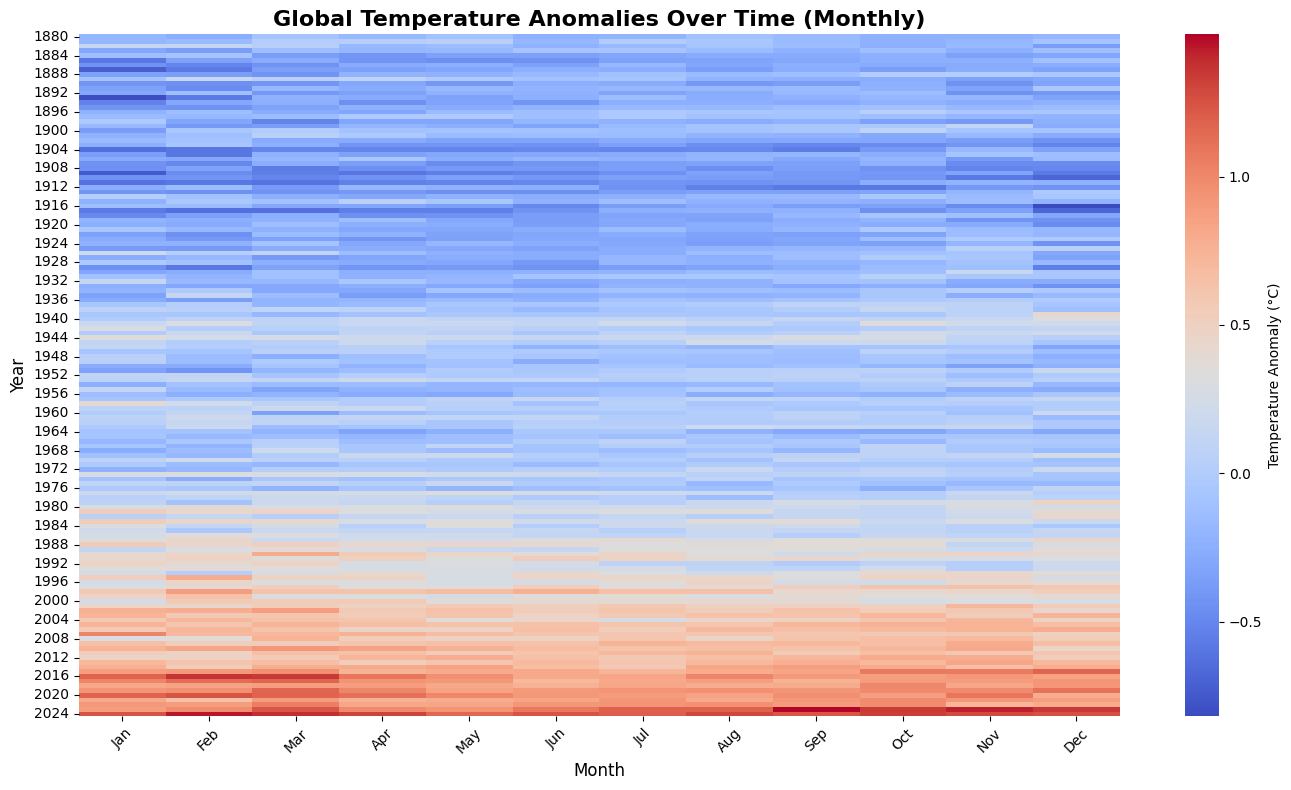

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Define the file path for the cleaned dataset
file_path = "/content/cleaned_monthly_temperature_anomalies.csv"  # Adjust path if necessary

# Load the cleaned NASA GISTEMP dataset
temp_data = pd.read_csv(file_path)

# Ensure the "Year" column is the index for the heatmap
temp_data.set_index("Year", inplace=True)

# Plot the heatmap for monthly temperature anomalies
plt.figure(figsize=(14, 8))  # Larger figure size for better clarity
sns.heatmap(temp_data, cmap="coolwarm", annot=False, cbar_kws={'label': 'Temperature Anomaly (°C)'})
plt.title("Global Temperature Anomalies Over Time (Monthly)", fontsize=16, weight='bold')
plt.xlabel("Month", fontsize=12)
plt.ylabel("Year", fontsize=12)
plt.xticks(rotation=45)  # Rotate month labels for better readability
plt.yticks(fontsize=10)  # Adjust font size for the years on the y-axis
plt.tight_layout()  # Ensure everything fits within the figure
plt.show()


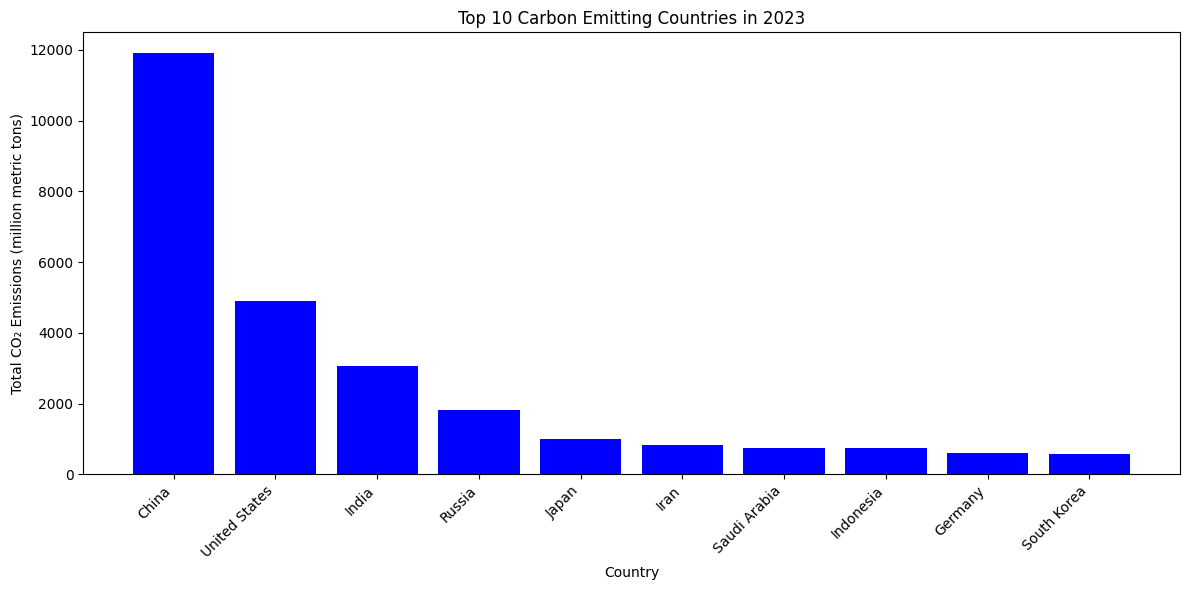

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CO₂ emissions data from the cleaned dataset
file_path = "/content/owid_co2_data.csv"  # Adjust path as needed
emissions_data = pd.read_csv(file_path)

# Filter for the latest year available in the dataset
latest_year = emissions_data["year"].max()
latest_year_data = emissions_data[emissions_data["year"] == latest_year]

# Exclude aggregate regions by filtering out rows with non-country entities
# Use a simple heuristic: only include rows where `iso_code` is not null
country_emissions = latest_year_data[latest_year_data["iso_code"].notnull()]

# Select the top 10 countries based on total CO₂ emissions
top_emitters = country_emissions[["country", "co2"]].sort_values(by="co2", ascending=False).head(10)

# Plot the bar chart
plt.figure(figsize=(12, 6))
plt.bar(top_emitters["country"], top_emitters["co2"], color="blue")

# Customize the chart
plt.xlabel("Country")
plt.ylabel("Total CO₂ Emissions (million metric tons)")
plt.title(f"Top 10 Carbon Emitting Countries in {latest_year}")
plt.xticks(rotation=45, ha="right")  # Ensure each label is clearly visible
plt.tight_layout()

# Display the chart
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


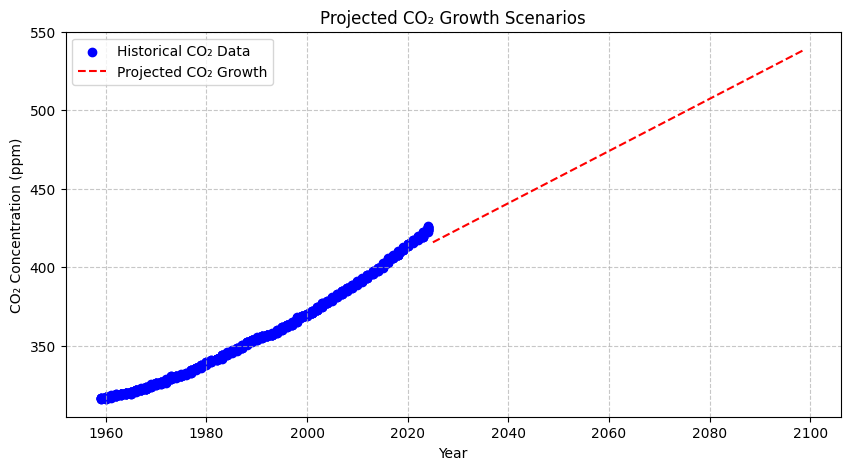

Linear Regression Equation:
CO₂ = 1.66 * Year + -2952.04

Predicted CO₂ Levels for Selected Years:
   Year  Predicted CO₂ (ppm)
0  2025           415.893694
1  2026           417.556871
2  2027           419.220048
3  2028           420.883225
4  2029           422.546402
5  2030           424.209579
6  2031           425.872756
7  2032           427.535933
8  2033           429.199110
9  2034           430.862287


In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load the cleaned dataset
file_path = "cleaned_co2_modeling_activity_4.csv"  # Ensure this file is already in your working directory
co2_data = pd.read_csv(file_path)

# Prepare data for modeling
X = co2_data[["Year"]]  # Use the "Year" column as input
y = co2_data["Interpolated CO2"]  # Use the "Interpolated CO2" as target

# Train linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict future CO₂ levels
future_years = np.arange(2025, 2100).reshape(-1, 1)  # Future years from 2025 to 2099
future_co2_predictions = model.predict(future_years)

# Plot historical and projected CO₂ levels
plt.figure(figsize=(10, 5))
plt.scatter(co2_data["Year"], co2_data["Interpolated CO2"], label="Historical CO₂ Data", color="blue")
plt.plot(future_years, future_co2_predictions, label="Projected CO₂ Growth", linestyle="dashed", color="red")
plt.xlabel("Year")
plt.ylabel("CO₂ Concentration (ppm)")
plt.title("Projected CO₂ Growth Scenarios")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

# Optional: Display the equation of the model
print("Linear Regression Equation:")
print(f"CO₂ = {model.coef_[0]:.2f} * Year + {model.intercept_:.2f}")

# Optional: Display predicted CO₂ levels for specific years
predicted_df = pd.DataFrame({
    "Year": future_years.flatten(),
    "Predicted CO₂ (ppm)": future_co2_predictions
})
print("\nPredicted CO₂ Levels for Selected Years:")
print(predicted_df.head(10))  # Display the first 10 rows
